Here we are importing the necessery libraries for our notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

We are importing warning to ignore them if any warning occures

In [2]:
import warnings
warnings.filterwarnings('ignore')

we are loading our dataset in our model

In [3]:
car= pd.read_csv("car data.csv")

To see what our dataset looks like

In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


To check the data types of the columns in dataset

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Generating descriptive statistics to summerize the data set

In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Checking if there is any missing values 

In [7]:
car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

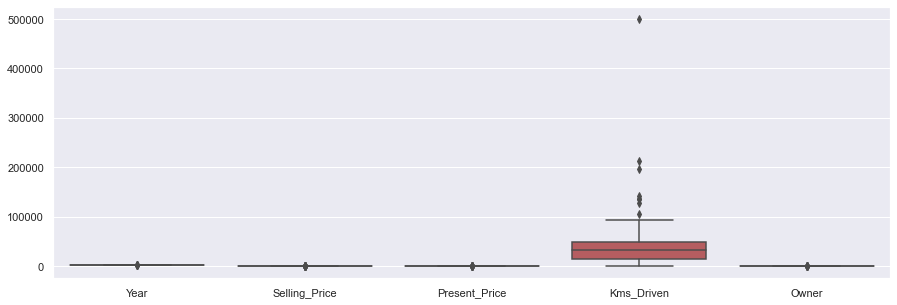

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=car)
plt.show()

To remove outliers found in the previous box plot

In [9]:
for outlier in ['Kms_Driven']:
    Q3, Q1 = np.percentile(car.loc[:,outlier],[75,25])
    iqr = Q3 - Q1
    lower_bound = Q1 - (1.5 * iqr)
    upper_bound = Q3 + (1.5 * iqr)
    
    car.loc[car[outlier]< lower_bound,outlier]=np.nan
    car.loc[car[outlier]> upper_bound,outlier]=np.nan
    

<AxesSubplot:>

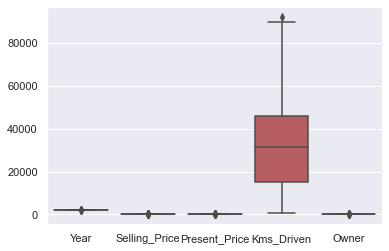

In [10]:
sns.boxplot(data=car)

Above is the graph after removing the outliers

In [11]:
car = car.dropna()

In [12]:
car =  car.drop('Car_Name', axis = 1)

In [13]:
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


Converting catagorical type columns to numeric

In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
car['Fuel_Type'] = enc.fit_transform(car['Fuel_Type'])
car['Seller_Type'] = enc.fit_transform(car['Seller_Type'])
car['Transmission'] = enc.fit_transform(car['Transmission'])


In [15]:
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000.0,2,0,1,0
1,2013,4.75,9.54,43000.0,1,0,1,0
2,2017,7.25,9.85,6900.0,2,0,1,0
3,2011,2.85,4.15,5200.0,2,0,1,0
4,2014,4.60,6.87,42450.0,1,0,1,0


Checking the corelations between all the columns

<AxesSubplot:>

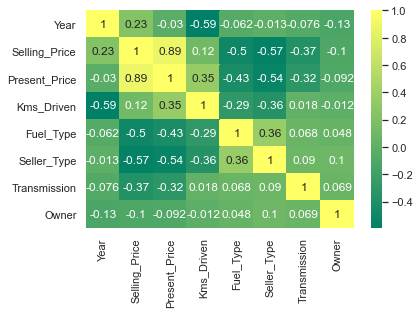

In [16]:
sns.heatmap(car.corr(),annot=True,cmap='summer')

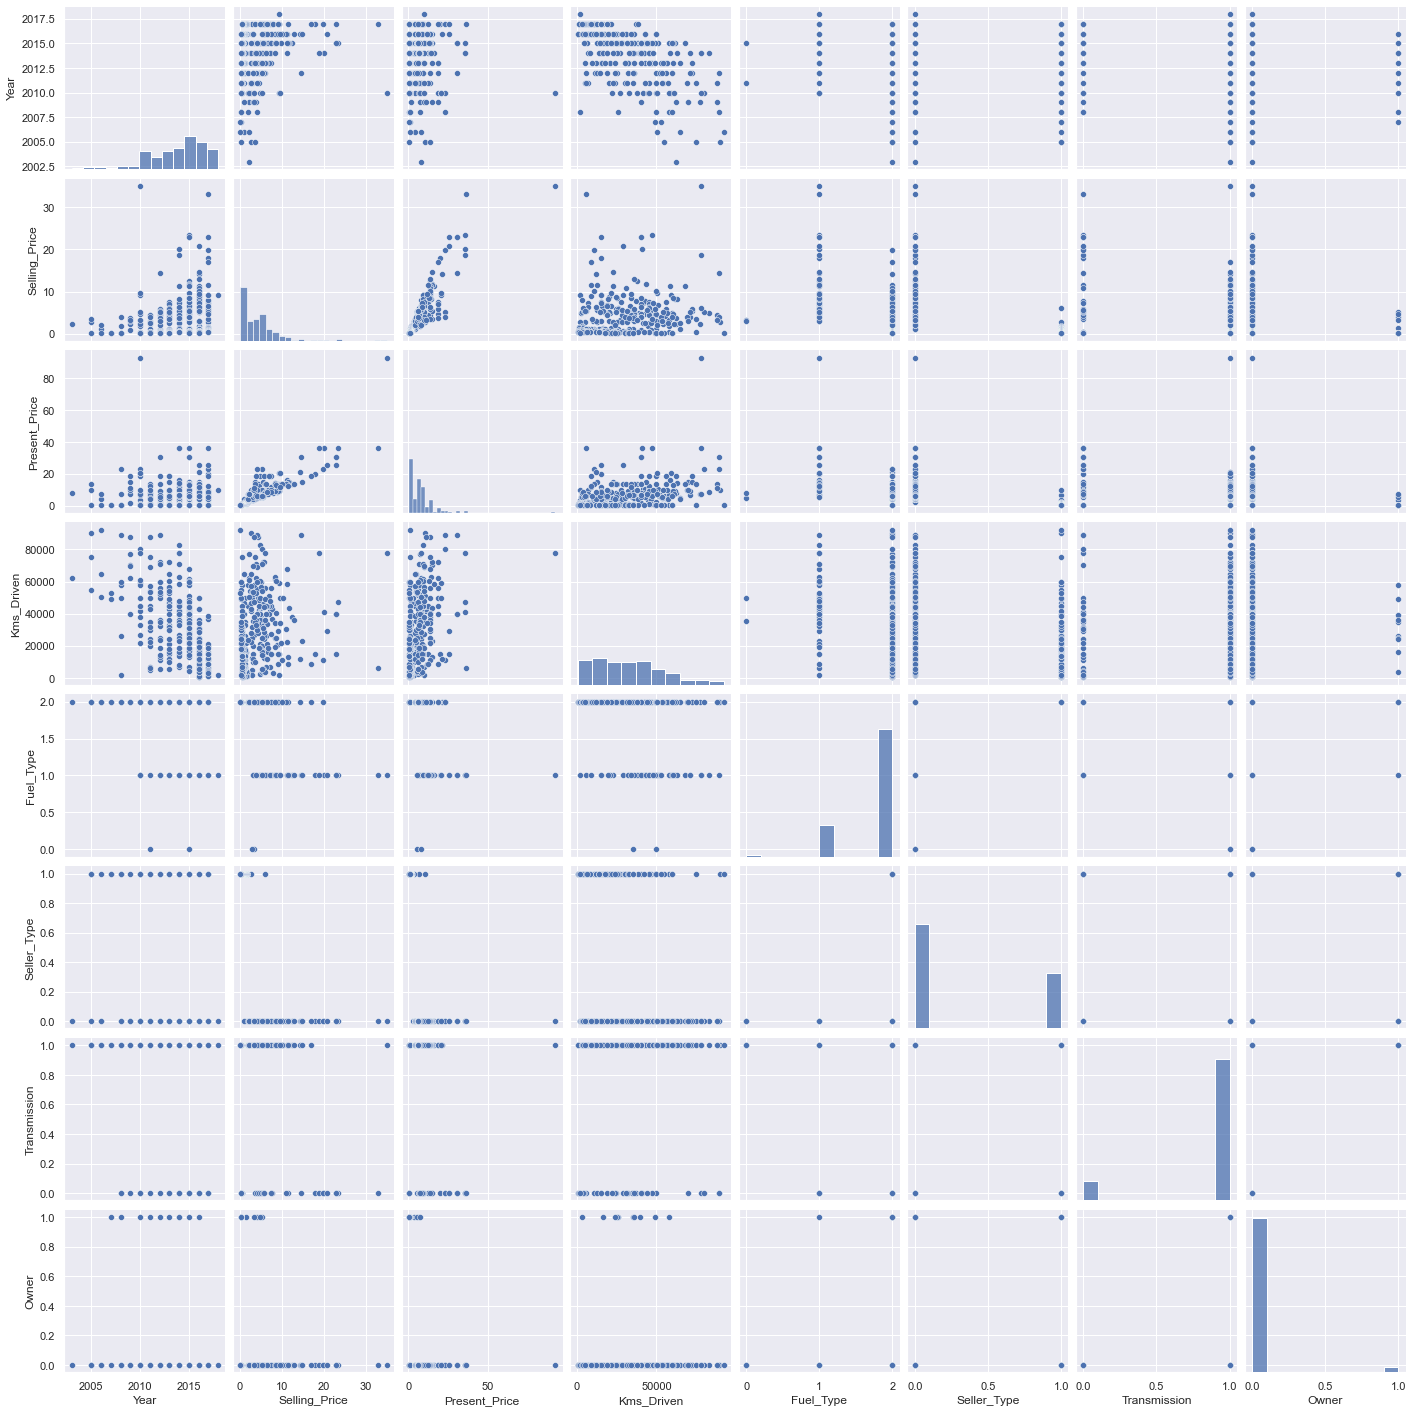

In [17]:
sns.pairplot(car)

Splitting the data into train and test sets

In [18]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car, test_size = 0.3, random_state = 100)


In [19]:
num_vars=['Selling_Price','Present_Price','Kms_Driven']

Performing scaling on the columns mentioned above

In [20]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [21]:
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [22]:
X_train = df_train.drop('Selling_Price',axis=1)
y_train = df_train['Selling_Price']

Here we are building the model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
X_test = df_test.drop('Selling_Price',axis=1)
y_test = df_test['Selling_Price']

In [26]:
y_pred = lr.predict(X_test)

In [27]:
lr.score(X_train,y_train)

0.8884043068010691

In [28]:
lr.score(X_test,y_test)

0.8825560264930339

Accuracy of my model is 88 percent